In [1]:
import pandas as pd
import numpy as np
from plotnine import *


## Helper function

In [2]:
def wrangle(dataframe, grouper, target):
    grouped = dataframe.groupby([grouper, target]).size().reset_index(name='counts')
    merged = pd.merge(grouped, dataframe.groupby(grouper).size().reset_index(name="group_count"))
    merged["percentage"] = merged['counts'] / merged["group_count"]
    #merged["percentage"] = merged["percentage"].round(2)

    return merged

# Load and Wrangle

In [3]:
df = pd.read_csv("data/germany.csv",
                 low_memory=False,
                 usecols=["state", "age","gender", "household_size",
                          "household_children", "employment_status",
                          "WAH5"],
                 na_values=' ')

In [4]:
df.sample(10)

,gender,age,state,household_size,household_children,employment_status,WAH5
31790,Female,27,Baden-Wurttemberg,3.0,0,Part time employment,NaN
27026,Female,54,Bavaria,2.0,0,Part time employment,NaN
25876,Male,54,Bavaria,3.0,1,Full time employment,NaN
18870,Female,68,Saxony,1.0,0,Retired,NaN
53969,Female,34,Mecklenburg-Vorpommern,2.0,0,Full time employment,NaN
22894,Male,65,North Rhine-Westphalia,1.0,0,Retired,NaN
53715,Male,63,Lower Saxony,2.0,0,Part time employment,NaN
43766,Male,71,North Rhine-Westphalia,1.0,0,Retired,NaN
29195,Female,63,North Rhine-Westphalia,1.0,0,Retired,NaN
5181,Male,71,North Rhine-Westphalia,2.0,0,Part time employment,NaN


In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

gender                 object
age                     int64
state                  object
household_size        float64
household_children     object
employment_status      object
WAH5                   object
dtype: object

In [7]:
for i in df.columns:
    print("-----")
    print("var_name:{}".format(i), df[i].unique())
    print("-----")

-----
var_name:gender ['Male' 'Female']
-----
-----
var_name:age [52 41 25 69 30 66 20 36 24 54 19 71 56 33 22 43 59 57 60 72 40 67 18 65
 32 78 55 89 79 49 37 51 39 42 29 64 31 45 58 53 35 46 34 21 27 47 76 63
 26 68 75 50 44 70 74 62 28 61 77 73 38 48 81 23]
-----
-----
var_name:state ['North Rhine-Westphalia' 'Hesse' 'Hamburg' 'Baden-Wurttemberg'
 'Brandenburg' 'Bavaria' 'Berlin' 'Saxony' 'Lower Saxony' 'Bremen'
 'Rheinland-Pfalz' 'Schleswig-Holstein' 'Mecklenburg-Vorpommern'
 'Saxony-Anhalt' 'Thuringia']
-----
-----
var_name:household_size [2. 4. 5. 3. 1. 6. 7.]
-----
-----
var_name:household_children ['0' '2' '1' '3' '5 or more' '4']
-----
-----
var_name:employment_status ['Full time employment' 'Part time employment' 'Full time student'
 'Retired' 'Unemployed' 'Not working' 'Other']
-----
-----
var_name:WAH5 ['Not at all likely' 'Not very likely' 'Likely' 'Very likely']
-----


In [8]:
df["household_children"] = df["household_children"].replace("5 or more", 5)

In [9]:
df["household_size"] = df["household_size"].astype("int64")
df["household_children"] = df["household_children"].astype("int64")
df["age_c"] =  pd.cut(df["age"], [18, 30, 40, 50, 60, 90], labels=[1,2,3,4,5], include_lowest=True)


In [10]:
df["WAH5"] = pd.Categorical(df["WAH5"],
                            categories=["Not at all likely", "Not very likely", "Likely", "Very likely"],
                            ordered=True)

In [11]:
df.age.max()

89

# Plots

In [12]:
plot_df = wrangle(df, "age_c", "WAH5")

In [13]:
plot_df["WAH5"] = pd.Categorical(plot_df["WAH5"],
               categories=["Not at all likely", "Not very likely", "Likely", "Very likely"],
               ordered=True)

In [14]:
ps_core = ["#FF412C", "#9F29FF", "#FF2380", "#06A6EE", "#31CAA8"]

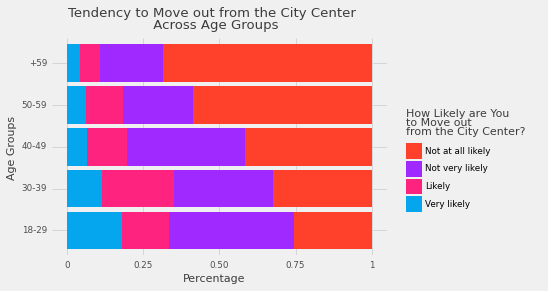

<ggplot: (8763787884797)>

In [15]:
plot = (ggplot(plot_df,
       aes(x="age_c", y="percentage", fill="WAH5")) +
 geom_col() +
 scale_fill_manual(name = "How Likely are You\nto Move out\nfrom the City Center? \n\n\n ",
                   values=ps_core) +
 xlab("Age Groups") +
 ylab("Percentage") +
 ggtitle("Tendency to Move out from the City Center \n Across Age Groups") +
 scale_x_discrete(labels=("18-29", "30-39", "40-49", "50-59", "+59") ) +
 coord_flip() + theme_538()
 )

plot

In [16]:
ggplot.save(self=plot,
            filename="age_vs_wah.png", dpi=1000)

/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: age_vs_wah.png


# Household Children

In [17]:
plot_df_2 = wrangle(df, "household_children", "WAH5")
plot_df_2.head()

,household_children,WAH5,counts,group_count,percentage
0,0,Not at all likely,183,352,0.519886
1,0,Not very likely,103,352,0.292614
2,0,Likely,41,352,0.116477
3,0,Very likely,25,352,0.071023
4,1,Not at all likely,14,45,0.311111


/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: children_vs_wah2.png


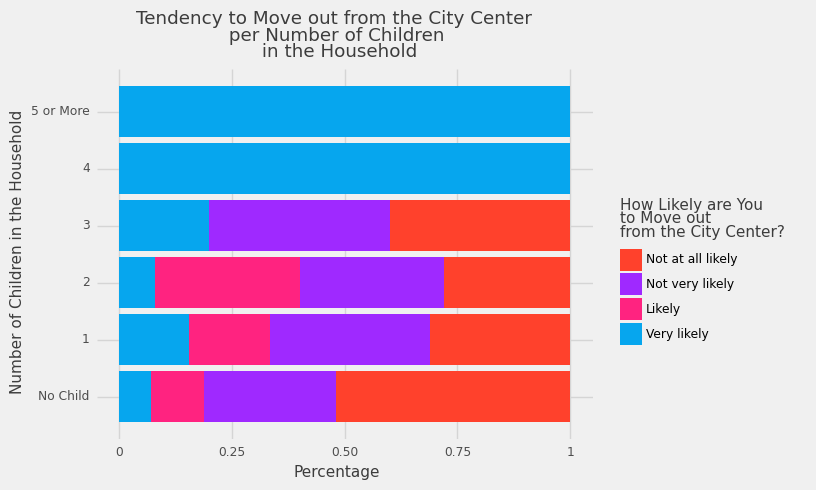

<ggplot: (8763763307213)>

In [18]:
plot2 = (ggplot(plot_df_2,
        aes(x="household_children", y="percentage", fill="WAH5")) +
        geom_col() +
        scale_fill_manual(name = "How Likely are You\nto Move out\nfrom the City Center? \n\n\n ",
                          values=ps_core) +
        xlab("Number of Children in the Household") +
        ylab("Percentage") +
        ggtitle("Tendency to Move out from the City Center \n per Number of Children \n in the Household") +
        scale_x_continuous(breaks =[0,1,2,3,4,5],
                           labels=("No Child", "1", "2", "3", "4", "5 or More") ) +
        coord_flip() + theme_538()
        )


ggplot.save(self=plot2,
            filename="children_vs_wah2.png", dpi=1000)

plot2

# State

In [19]:
plot_df_3 = wrangle(df, "state", "WAH5")
plot_df_3.head()

,state,WAH5,counts,group_count,percentage
0,Baden-Wurttemberg,Not at all likely,20,31,0.645161
1,Baden-Wurttemberg,Not very likely,6,31,0.193548
2,Baden-Wurttemberg,Likely,3,31,0.096774
3,Baden-Wurttemberg,Very likely,2,31,0.064516
4,Bavaria,Not at all likely,20,54,0.370370


/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: state_vs_wah.png


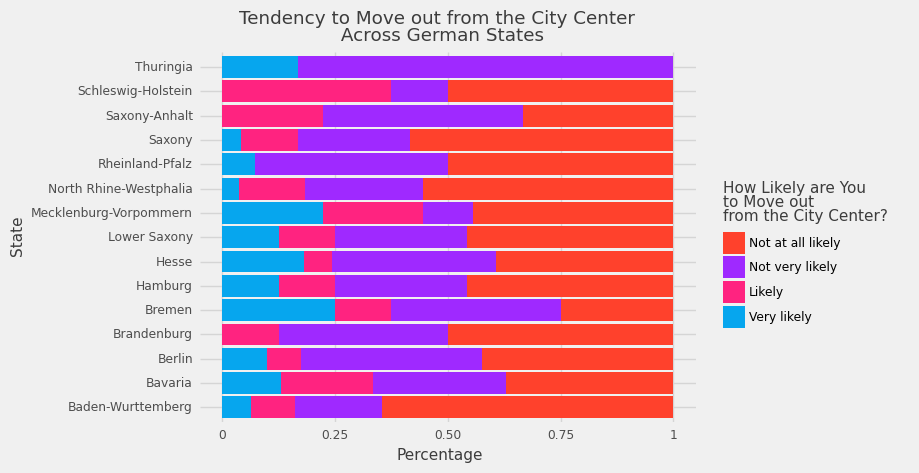

<ggplot: (8763763934997)>

In [20]:
plot3 = (ggplot(plot_df_3,
        aes(x="state", y="percentage", fill="WAH5")) +
 geom_col() +
 scale_fill_manual(name ="How Likely are You\nto Move out\nfrom the City Center? \n\n\n ",
                   values = ps_core) +
 xlab("State") +
 ylab("Percentage") +
 ggtitle("Tendency to Move out from the City Center \n Across German States") +
 scale_x_discrete(
                    labels=plot_df_3.state.unique()) +
 coord_flip() + theme_538()
 )

ggplot.save(self=plot3,
            filename="state_vs_wah.png", dpi=1000)

plot3

# Employment Status

/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/tugberk/DataspellProjects/PD_Scraping/pd_scraper/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: employment_status.png


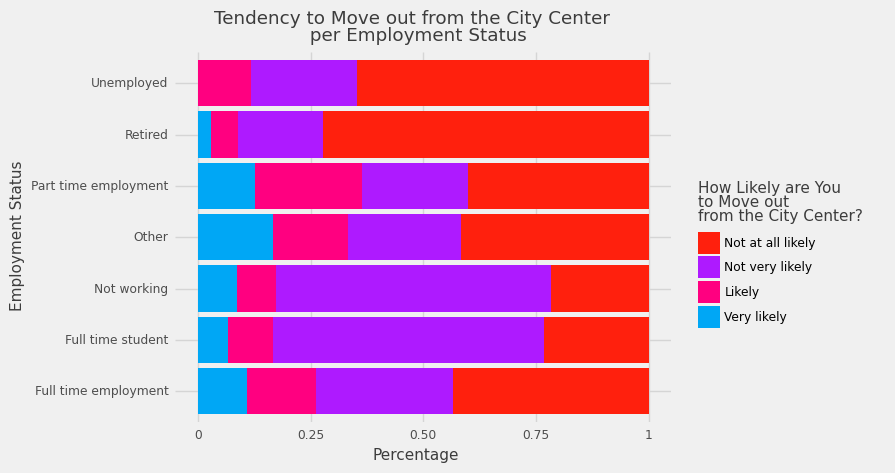

<ggplot: (8763762884317)>

In [21]:
plot_df_4 = wrangle(df, "employment_status", "WAH5")

plot4 = (ggplot(plot_df_4,
                aes(x="employment_status", y="percentage", fill="WAH5")) +
         geom_col() +
         scale_fill_manual(name="How Likely are You\nto Move out\nfrom the City Center? \n\n\n ",
                           values=("#FF200D",
                                   "#AE1AFF",
                                   "#FF0080",
                                   "#00A7F5",
                                   "#00CEA6")) +
         xlab("Employment Status") +
         ylab("Percentage") +
         ggtitle("Tendency to Move out from the City Center \n per Employment Status") +
         scale_x_discrete(
             labels=plot_df_4.employment_status.unique()) +
         coord_flip() + theme_538()
         )

ggplot.save(self=plot4,
            filename="employment_status.png", dpi=1000)

plot4